## Reading a file of one shot, with obspy module

First install the module, take of the #-Symbol and execute the cell below. If you did'nt to that allready.

In [1]:
#!pip install obspy

In [2]:
#import all required packages
import numpy as np  
import matplotlib.pyplot as plt
from obspy import read

In [3]:
#here we read a file with the read function 
#Change the name of the readed file
seg2_data = read('Leine6-7-23/1001.dat', format='SEG2')# 
print(type(seg2_data), np.shape(seg2_data))

<class 'obspy.core.stream.Stream'> (48, 750)


/home/goeran/.local/lib/python3.10/site-packages/obspy/io/seg2/seg2.py:365: UserWarning: Many companies use custom defined SEG2 header variables. This might cause basic header information reflected in the single traces' stats to be wrong (e.g. recording delays, first sample number, station code names, ..). Please check the complete list of additional unmapped header fields that gets stored in Trace.stats.seg2 and/or the manual of the source of the SEG2 files for fields that might influence e.g. trace start times.
  warnings.warn(WARNING_HEADER)


## Obspy created a data structure, that we convert into suitable variables

In [4]:
nx=len(seg2_data) #number of traces
nt=len(seg2_data[0].data) #number of time samples
dt=(seg2_data[0].stats.delta) #sampling interval
srcloc=float(seg2_data[0].stats.seg2['SOURCE_LOCATION'])#check if it doesnt change for each trace
shot_gather = np.zeros((  len(seg2_data[0].data),nx)) #preserve some memory for cmp data in matrix
offsets = np.zeros((nx)) #preserve memory for ...

# Iterate through the traces for the current shot and store the data
for j in range(nx):
    shot_gather[:,j] = seg2_data[j].data  # 
    offsets[j]=float(seg2_data[j].stats.seg2['RECEIVER_LOCATION'])
print(offsets)
offsets=(offsets-srcloc)*2 #never trust headers and meta data
print(offsets)

[  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100. 104. 108.
 112. 116. 120. 124. 128. 132. 136. 140. 144. 148. 152. 156. 160. 164.
 168. 172. 176. 180. 184. 188.]
[ 96. 104. 112. 120. 128. 136. 144. 152. 160. 168. 176. 184. 192. 200.
 208. 216. 224. 232. 240. 248. 256. 264. 272. 280. 288. 296. 304. 312.
 320. 328. 336. 344. 352. 360. 368. 376. 384. 392. 400. 408. 416. 424.
 432. 440. 448. 456. 464. 472.]


## Let's do a little Amplification with a linear of hyperbolic function to see atenuated waves after longer distances

In [5]:
Hff=np.linspace(0,np.max(shot_gather),nt)#**2  #sperical correction
Hfm=np.tile(Hff, (nx, 1)).T
#plt.plot(Hfm)
shot_gather=shot_gather*Hfm
shot_gather=shot_gather/(np.max(shot_gather))

In [ ]:
Do great plotting and draw some guessed refractions and reflection functions

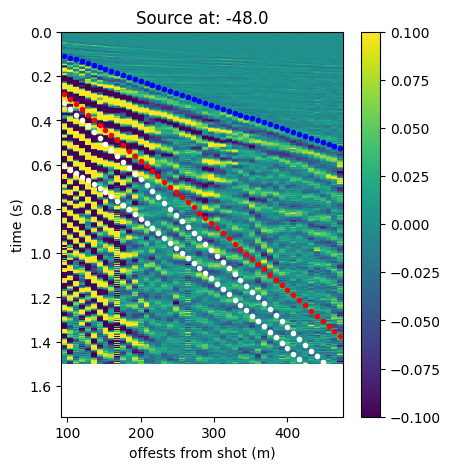

In [8]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Shot gather')
ax.set_xlabel('offests from shot (m)')
ax.set_ylabel('time (s)')
cmap = ax.pcolormesh(offsets, np.linspace(0,dt*nt,nt), shot_gather, vmin= -0.1, vmax= 0.1)
plt.gca().invert_yaxis()
fig.colorbar(cmap)
plt.title(f'Source at: {srcloc}')
#plotting a air wave.. 343 m/s
plt.plot(offsets,np.abs(np.linspace(offsets[0]/343,offsets[-1]/343,len(offsets))),'r.')

plt.plot(offsets,np.abs(np.linspace(offsets[0]/900,offsets[-1]/900,len(offsets))),'b.')
#First Layer velocity
reflectordepthas=155

testVelo2=300 #m/s sand+Carbonhyd
plt.plot(offsets,np.abs(np.linspace(offsets[0]/testVelo2,offsets[-1]/testVelo2,len(offsets))),'w.')
pltime = np.sqrt((reflectordepthas/testVelo2)**2 + (offsets/testVelo2)**2)
plt.plot(offsets,pltime,'w.')

## Does it make sence to do apply the functions to shot gathers? 
World is not flad...
So continue with 00_theCube2CMP.ipynb.